In [7]:
# Step 1: 导入所需程序库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
import pandas as pd

# Load the dataset
file_path = "D:\\Desktop\\All data from 2015 to 2021.csv"
df = pd.read_csv(file_path)

# Display basic info and preview the data
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 77 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Area Code                                                       2387 non-null   object 
 1   Area Name                                                       2387 non-null   object 
 2   Area Type [Note 3]                                              2387 non-null   object 
 3   Healthy People Domain                                           2387 non-null   float64
 4   Difficulties in daily life [Pe]                                 2387 non-null   float64
 5   Disability [Pe1]                                                2387 non-null   float64
 6   Frailty [Pe1]                                                   2387 non-null   float64
 7   Mental health [Pe]                                 

(None,
    Area Code             Area Name Area Type [Note 3]  Healthy People Domain  \
 0  E92000001               ENGLAND            Country                  100.0   
 1  E12000001            North East             Region                   87.9   
 2  E06000001            Hartlepool               LTLA                   83.9   
 3  E06000002         Middlesbrough               LTLA                   85.9   
 4  E06000003  Redcar and Cleveland               LTLA                   94.4   
 
    Difficulties in daily life [Pe]  Disability [Pe1]  Frailty [Pe1]  \
 0                            100.0             100.0          100.0   
 1                             87.1              91.1           87.7   
 2                             79.0              79.1           86.6   
 3                             90.2             101.7           82.3   
 4                             94.0              94.4           95.8   
 
    Mental health [Pe]  Children's social, emotional and mental health 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Drop Area Code (assume it's not useful) and define features/target
df_clean = df.drop(columns=["Area Code"])
X = df_clean.drop(columns=["index health"])
y = df_clean["index health"]

# Identify categorical and numerical columns
categorical_cols = ["Area Name", "Area Type [Note 3]"]
numerical_cols = X.columns.difference(categorical_cols)

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Apply the transformation pipeline
X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1909, 418), (478, 418), (1909,), (478,))

In [33]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to hold models and their results
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}

results


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17864
[LightGBM] [Info] Number of data points in the train set: 1909, number of used features: 76
[LightGBM] [Info] Start training from score 103.226978


{'Random Forest': {'RMSE': 1.115513935818009, 'R2': 0.9870442362117445},
 'XGBoost': {'RMSE': 0.9510195907012592, 'R2': 0.9905834471623644},
 'LightGBM': {'RMSE': 0.7842887926979106, 'R2': 0.9935957977462461}}

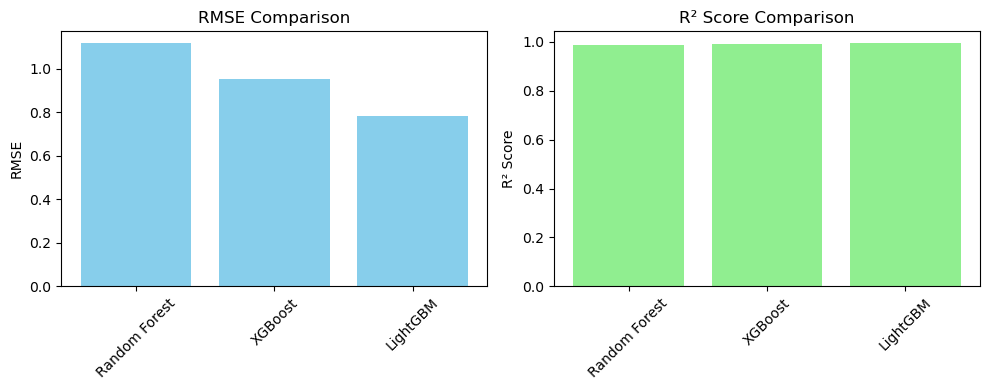

In [19]:
import matplotlib.pyplot as plt

# 模型名称和评估指标
model_names = ["Random Forest", "XGBoost", "LightGBM"]
rmse_scores = [1.1155, 0.9510, 0.7843]
r2_scores = [0.9870, 0.9906, 0.9936]

# 绘图
plt.figure(figsize=(10, 4))

# RMSE 条形图
plt.subplot(1, 2, 1)
plt.bar(model_names, rmse_scores, color='skyblue')
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.xticks(rotation=45)

# R2 条形图
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores, color='lightgreen')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


D:\MyEnv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  Fit OneHotEncoder to X.


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 640)]        0           []                               
                                                                                                  
 reshape_2 (Reshape)            (None, 20, 32)       0           ['input_4[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 20, 1)        33          ['reshape_2[0][0]']              
                                                                                                  
 tf.nn.softmax_3 (TFOpLambda)   (None, 20, 1)        0           ['dense_9[0][0]']                
                                                                                            

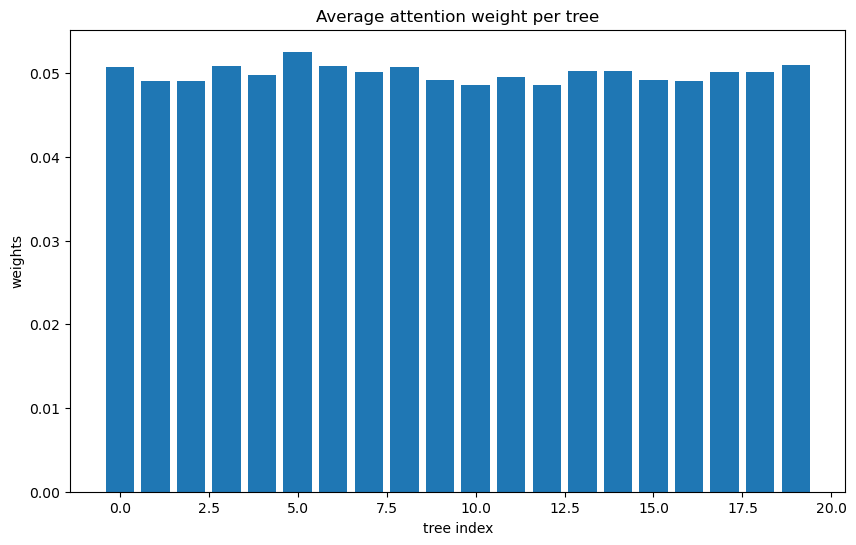

In [36]:
rf = RandomForestRegressor(
    n_estimators=20,
    max_leaf_nodes=32,  # 固定每棵树的最大叶节点数
    random_state=42
)
rf.fit(X_train.toarray(), y_train)

# 提取叶节点索引
leaf_ids_train = rf.apply(X_train.toarray())
leaf_ids_test = rf.apply(X_test.toarray())
n_trees = leaf_ids_train.shape[1]

# OneHot编码
encoder = OneHotEncoder(sparse=False)
tree_features_train = encoder.fit_transform(leaf_ids_train)
tree_features_test = encoder.transform(leaf_ids_test)

# 修正叶节点计算
n_leaves_per_tree = len(encoder.categories_[0])  # 从编码器直接获取每棵树的叶节点数
total_features = n_trees * n_leaves_per_tree

# 验证特征维度
assert tree_features_train.shape[1] == total_features, \
    f"Feature dimension mismatch！have expectations{total_features}，practice{tree_features_train.shape[1]}"

# ======================
# 第二部分：更新模型架构
# ======================

def build_attention_model(n_trees, n_leaves_per_tree):
    input_layer = Input(shape=(total_features,))
    
    # 动态重塑层
    reshaped = Reshape((n_trees, n_leaves_per_tree))(input_layer)
    
    # 注意力权重
    attention_weights = Dense(1, activation='sigmoid')(reshaped)
    attention_weights = K.softmax(attention_weights, axis=1)
    
    # 特征加权
    weighted_features = Multiply()([reshaped, attention_weights])
    aggregated = K.sum(weighted_features, axis=1)
    
    # 回归预测
    x = Dense(64, activation='relu')(aggregated)
    output = Dense(1)(x)
    
    return Model(inputs=input_layer, outputs=output)

# 初始化模型
model = build_attention_model(n_trees, n_leaves_per_tree)
model.compile(optimizer='adam', loss='mse')
model.summary()

# ======================
# 第三部分：模型训练与验证
# ======================

history = model.fit(
    tree_features_train, y_train,
    validation_data=(tree_features_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# 预测评估
y_pred = model.predict(tree_features_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nNeural Attention Forest performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# ======================
# 第四部分：可视化修正
# ======================

# 获取注意力权重
attention_model = Model(inputs=model.input, outputs=model.layers[3].output)
attention_weights = attention_model.predict(tree_features_test)

# 可视化每棵树的平均权重
plt.figure(figsize=(10, 6))
plt.bar(range(n_trees), np.mean(attention_weights.squeeze(), axis=0))
plt.title("Average attention weight per tree")
plt.xlabel("tree index")
plt.ylabel("weights")
plt.show()